# UFC-Fight historical data from 1993 to 2019
https://www.kaggle.com/rajeevw/ufcdata

https://github.com/WarrierRajeev/UFC-Predictions

## Questions
1. Is data.csv calculated correctly?
    1. Is the aggregate damage average correct?
    1. Is the aggregated opponent average correct?
1. Who won the most fights?
1. What's the best age to win fights?
1. Who won the most title fights?
1. Which accuracy can be reached for the prediction of the winner?

# Get clean data

The way to go:
1. Examine the data
1. Handle missing values
1. Delete unneccesary data
1. Write an output file for further processing

In [152]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.impute import SimpleImputer

Use the partly preprocessed data source from kaggle.
Don't aggregate the data for the previous fights ourselves.

Random samples where recalculated in Excel to be sure they are correct.
E.g. Henry Cejudo's first 3 fights.
The work of Rajeev Warrier seems OK.

In [153]:
df = pd.read_csv("../data/raw/UFC/data.csv", sep=",")

In [154]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

## Examine the data

In [155]:
df.dtypes

R_fighter                        object
B_fighter                        object
Referee                          object
date                             object
location                         object
Winner                           object
title_bout                         bool
weight_class                     object
no_of_rounds                      int64
B_current_lose_streak           float64
B_current_win_streak            float64
B_draw                          float64
B_avg_BODY_att                  float64
B_avg_BODY_landed               float64
B_avg_CLINCH_att                float64
B_avg_CLINCH_landed             float64
B_avg_DISTANCE_att              float64
B_avg_DISTANCE_landed           float64
B_avg_GROUND_att                float64
B_avg_GROUND_landed             float64
B_avg_HEAD_att                  float64
B_avg_HEAD_landed               float64
B_avg_KD                        float64
B_avg_LEG_att                   float64
B_avg_LEG_landed                float64


In [156]:
df

R_fighter       B_fighter               Referee        date  \
0             Henry Cejudo   Marlon Moraes          Marc Goddard  2019-06-08   
1     Valentina Shevchenko     Jessica Eye       Robert Madrigal  2019-06-08   
2            Tony Ferguson  Donald Cerrone       Dan Miragliotta  2019-06-08   
3            Jimmie Rivera        Petr Yan       Kevin MacDonald  2019-06-08   
4              Tai Tuivasa   Blagoy Ivanov       Dan Miragliotta  2019-06-08   
...                    ...             ...                   ...         ...   
5139        Gerard Gordeau    Kevin Rosier  Joao Alberto Barreto  1993-11-12   
5140          Ken Shamrock   Patrick Smith  Joao Alberto Barreto  1993-11-12   
5141          Royce Gracie   Art Jimmerson  Joao Alberto Barreto  1993-11-12   
5142          Kevin Rosier    Zane Frazier  Joao Alberto Barreto  1993-11-12   
5143        Gerard Gordeau      Teila Tuli  Joao Alberto Barreto  1993-11-12   

                    location Winner  title_bout       weight_class  \
0     Chicago, Illinois, USA    Red        True       Bantamweight   
1     Chicago, Illinois, USA    Red        True  Women's Flyweight   
2     Chicago, Illinois, USA    Red       False        Lightweight   
3     Chicago, Illinois, USA   Blue       False       Bantamweight   
4     Chicago, Illinois, USA   Blue       False        Heavyweight   
...                      ...    ...         ...                ...   
5139   Denver, Colorado, USA    Red       False        Open Weight   
5140   Denver, Colorado, USA    Red       False        Open Weight   
5141   Denver, Colorado, USA    Red       False        Open Weight   
5142   Denver, Colorado, USA    Red       False        Open Weight   
5143   Denver, Colorado, USA    Red       False        Open Weight   

      no_of_rounds  B_current_lose_streak  B_current_win_streak  B_draw  \
0                5                    0.0                   4.0     0.0   
1                5                    0.0                   3.0     0.0   
2                3                    0.0                   3.0     0.0   
3                3                    0.0                   4.0     0.0   
4                3                    0.0                   1.0     0.0   
...            ...                    ...                   ...     ...   
5139             1                    0.0                   1.0     0.0   
5140             1                    0.0                   0.0     0.0   
5141             1                    0.0                   0.0     0.0   
5142             1                    0.0                   0.0     0.0   
5143             1                    0.0                   0.0     0.0   

      B_avg_BODY_att  B_avg_BODY_landed  B_avg_CLINCH_att  \
0           9.200000           6.000000          0.200000   
1          14.600000           9.100000         11.800000   
2          15.354839          11.322581          6.741935   
3          17.000000          14.000000         13.750000   
4          17.000000          14.500000          2.500000   
...              ...                ...               ...   
5139        4.000000           3.000000          9.000000   
5140             NaN                NaN               NaN   
5141             NaN                NaN               NaN   
5142             NaN                NaN               NaN   
5143             NaN                NaN               NaN   

      B_avg_CLINCH_landed  B_avg_DISTANCE_att  B_avg_DISTANCE_landed  \
0                0.000000           62.600000              20.600000   
1                7.300000          124.700000              42.100000   
2                4.387097           84.741935              38.580645   
3               11.000000          109.500000              48.750000   
4                2.000000          201.000000              59.500000   
...                   ...                 ...                    ...   
5139             4.000000           10.000000               4.000000   
5140 

In [157]:
df.T

0                       1     \
R_fighter                               Henry Cejudo    Valentina Shevchenko   
B_fighter                              Marlon Moraes             Jessica Eye   
Referee                                 Marc Goddard         Robert Madrigal   
date                                      2019-06-08              2019-06-08   
location                      Chicago, Illinois, USA  Chicago, Illinois, USA   
Winner                                           Red                     Red   
title_bout                                      True                    True   
weight_class                            Bantamweight       Women's Flyweight   
no_of_rounds                                       5                       5   
B_current_lose_streak                              0                       0   
B_current_win_streak                               4                       3   
B_draw                                             0                       0   
B_avg_BODY_att                                   9.2                    14.6   
B_avg_BODY_landed                                  6                     9.1   
B_avg_CLINCH_att                                 0.2                    11.8   
B_avg_CLINCH_landed                                0                     7.3   
B_avg_DISTANCE_att                              62.6                   124.7   
B_avg_DISTANCE_landed                           20.6                    42.1   
B_avg_GROUND_att                                 2.6                     2.4   
B_avg_GROUND_landed                                2                     1.9   
B_avg_HEAD_att                                  48.6                     112   
B_avg_HEAD_landed                               11.2                      32   
B_avg_KD                                         0.8                       0   
B_avg_LEG_att                                    7.6                    12.3   
B_avg_LEG_landed                                 5.4                    10.2   
B_avg_PASS                                       0.4                     0.8   
B_avg_REV                                          0                       0   
B_avg_SIG_STR_att                               65.4                   138.9   
B_avg_SIG_STR_landed                            22.6                    51.3   
B_avg_SIG_STR_pct                              0.466                   0.399   
B_avg_SUB_ATT                                    0.4                     0.7   
B_avg_TD_att                                     0.8                       1   
B_avg_TD_landed                                  0.2                     0.5   
B_avg_TD_pct                                     0.1                   0.225   
B_avg_TOTAL_STR_att                             66.4                   158.7   
B_avg_TOTAL_STR_landed                          23.6                    69.6   
B_longest_win_streak                               4                       3   
B_losses                                           1                       6   
B_avg_opp_BODY_att                               6.4                      13   
B_avg_opp_BODY_landed                              4                     9.3   
B_avg_opp_CLINCH_att                               1                    12.8   
B_avg_opp_CLINCH_landed                          0.6                     9.6   
B_avg_opp_DISTANCE_att                          51.2                   101.7   
B_avg_opp_DISTANCE_landed                       17.4                      32   
B_avg_opp_GROUND_att                             0.6                     8.1   
B_avg_opp_GROUND_landed                          0.2                     6.9   
B_avg_opp_HEAD_att                              39.6                    97.7   
B_avg_opp_HEAD_landed                            9.4                    30.8   
B_avg_opp_KD                                     0.2                     0.1   
B_avg_opp_LEG_att                               

## Handle missing values

### Get insights about the missing values

In [158]:
df.isna().sum()

R_fighter                          0
B_fighter                          0
Referee                           23
date                               0
location                           0
Winner                             0
title_bout                         0
weight_class                       0
no_of_rounds                       0
B_current_lose_streak              0
B_current_win_streak               0
B_draw                             0
B_avg_BODY_att                  1265
B_avg_BODY_landed               1265
B_avg_CLINCH_att                1265
B_avg_CLINCH_landed             1265
B_avg_DISTANCE_att              1265
B_avg_DISTANCE_landed           1265
B_avg_GROUND_att                1265
B_avg_GROUND_landed             1265
B_avg_HEAD_att                  1265
B_avg_HEAD_landed               1265
B_avg_KD                        1265
B_avg_LEG_att                   1265
B_avg_LEG_landed                1265
B_avg_PASS                      1265
B_avg_REV                       1265
B

In [159]:
# used before finding the set_option('display.max_rows', 200) option
def nan_cols():
    print ("NaN columns")
    for col in df:
        if pd.isnull(df[col]).sum() > 0:
            print (col, pd.isnull(df[col]).sum())

In [160]:
# reset to default max
pd.set_option('display.max_rows', 0)
pd.set_option('display.max_columns', 0)

### Drop rows with no history
Each row in the dataset is a aggregation of previous fights. If metrics are NaN, then it is of no use for us. Could be the first fight at all. Delete those rows.

In [161]:
# are there NaN for total rounds?
df[(df.B_total_rounds_fought.isna()) | (df.R_total_rounds_fought.isna())]

Empty DataFrame
Columns: [R_fighter, B_fighter, Referee, date, location, Winner, title_bout, weight_class, no_of_rounds, B_current_lose_streak, B_current_win_streak, B_draw, B_avg_BODY_att, B_avg_BODY_landed, B_avg_CLINCH_att, B_avg_CLINCH_landed, B_avg_DISTANCE_att, B_avg_DISTANCE_landed, B_avg_GROUND_att, B_avg_GROUND_landed, B_avg_HEAD_att, B_avg_HEAD_landed, B_avg_KD, B_avg_LEG_att, B_avg_LEG_landed, B_avg_PASS, B_avg_REV, B_avg_SIG_STR_att, B_avg_SIG_STR_landed, B_avg_SIG_STR_pct, B_avg_SUB_ATT, B_avg_TD_att, B_avg_TD_landed, B_avg_TD_pct, B_avg_TOTAL_STR_att, B_avg_TOTAL_STR_landed, B_longest_win_streak, B_losses, B_avg_opp_BODY_att, B_avg_opp_BODY_landed, B_avg_opp_CLINCH_att, B_avg_opp_CLINCH_landed, B_avg_opp_DISTANCE_att, B_avg_opp_DISTANCE_landed, B_avg_opp_GROUND_att, B_avg_opp_GROUND_landed, B_avg_opp_HEAD_att, B_avg_opp_HEAD_landed, B_avg_opp_KD, B_avg_opp_LEG_att, B_avg_opp_LEG_landed, B_avg_opp_PASS, B_avg_opp_REV, B_avg_opp_SIG_STR_att, B_avg_opp_SIG_STR_landed, B_avg_opp_SIG_STR_pct, B_avg_opp_SUB_ATT, B_avg_opp_TD_att, B_avg_opp_TD_landed, B_avg_opp_TD_pct, B_avg_opp_TOTAL_STR_att, B_avg_opp_TOTAL_STR_landed, B_total_rounds_fought, B_total_time_fought(seconds), B_total_title_bouts, B_win_by_Decision_Majority, B_win_by_Decision_Split, B_win_by_Decision_Unanimous, B_win_by_KO/TKO, B_win_by_Submission, B_win_by_TKO_Doctor_Stoppage, B_wins, B_Stance, B_Height_cms, B_Reach_cms, B_Weight_lbs, R_current_lose_streak, R_current_win_streak, R_draw, R_avg_BODY_att, R_avg_BODY_landed, R_avg_CLINCH_att, R_avg_CLINCH_landed, R_avg_DISTANCE_att, R_avg_DISTANCE_landed, R_avg_GROUND_att, R_avg_GROUND_landed, R_avg_HEAD_att, R_avg_HEAD_landed, R_avg_KD, R_avg_LEG_att, R_avg_LEG_landed, R_avg_PASS, R_avg_REV, R_avg_SIG_STR_att, R_avg_SIG_STR_landed, R_avg_SIG_STR_pct, R_avg_SUB_ATT, R_avg_TD_att, R_avg_TD_landed, ...]
Index: []

[0 rows x 145 columns]

In [162]:
# which cols are NaN?
nan_cols()

NaN columns
Referee 23
B_avg_BODY_att 1265
B_avg_BODY_landed 1265
B_avg_CLINCH_att 1265
B_avg_CLINCH_landed 1265
B_avg_DISTANCE_att 1265
B_avg_DISTANCE_landed 1265
B_avg_GROUND_att 1265
B_avg_GROUND_landed 1265
B_avg_HEAD_att 1265
B_avg_HEAD_landed 1265
B_avg_KD 1265
B_avg_LEG_att 1265
B_avg_LEG_landed 1265
B_avg_PASS 1265
B_avg_REV 1265
B_avg_SIG_STR_att 1265
B_avg_SIG_STR_landed 1265
B_avg_SIG_STR_pct 1265
B_avg_SUB_ATT 1265
B_avg_TD_att 1265
B_avg_TD_landed 1265
B_avg_TD_pct 1265
B_avg_TOTAL_STR_att 1265
B_avg_TOTAL_STR_landed 1265
B_avg_opp_BODY_att 1265
B_avg_opp_BODY_landed 1265
B_avg_opp_CLINCH_att 1265
B_avg_opp_CLINCH_landed 1265
B_avg_opp_DISTANCE_att 1265
B_avg_opp_DISTANCE_landed 1265
B_avg_opp_GROUND_att 1265
B_avg_opp_GROUND_landed 1265
B_avg_opp_HEAD_att 1265
B_avg_opp_HEAD_landed 1265
B_avg_opp_KD 1265
B_avg_opp_LEG_att 1265
B_avg_opp_LEG_landed 1265
B_avg_opp_PASS 1265
B_avg_opp_REV 1265
B_avg_opp_SIG_STR_att 1265
B_avg_opp_SIG_STR_landed 1265
B_avg_opp_SIG_STR_pct 126

In [163]:
# delete records with 0 aggregated rounds which should eliminate most of the NaN values as well
df = df[(df.B_total_rounds_fought > 0) & (df.R_total_rounds_fought > 0)]

In [164]:
nan_cols()

NaN columns
Referee 16
B_Stance 74
B_Height_cms 1
B_Reach_cms 260
R_Stance 76
R_Reach_cms 111
B_age 56
R_age 12


### Try to guess Reach from Height

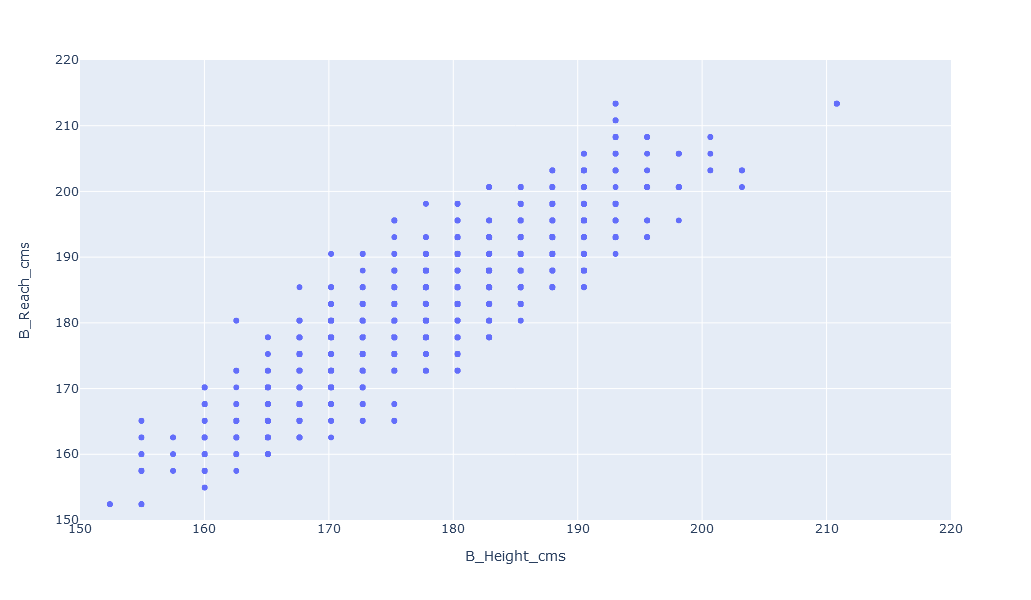

In [165]:
px.scatter(df, x="B_Height_cms", y="B_Reach_cms", range_x=[150,220], range_y=[150,220], width=600, height=600)

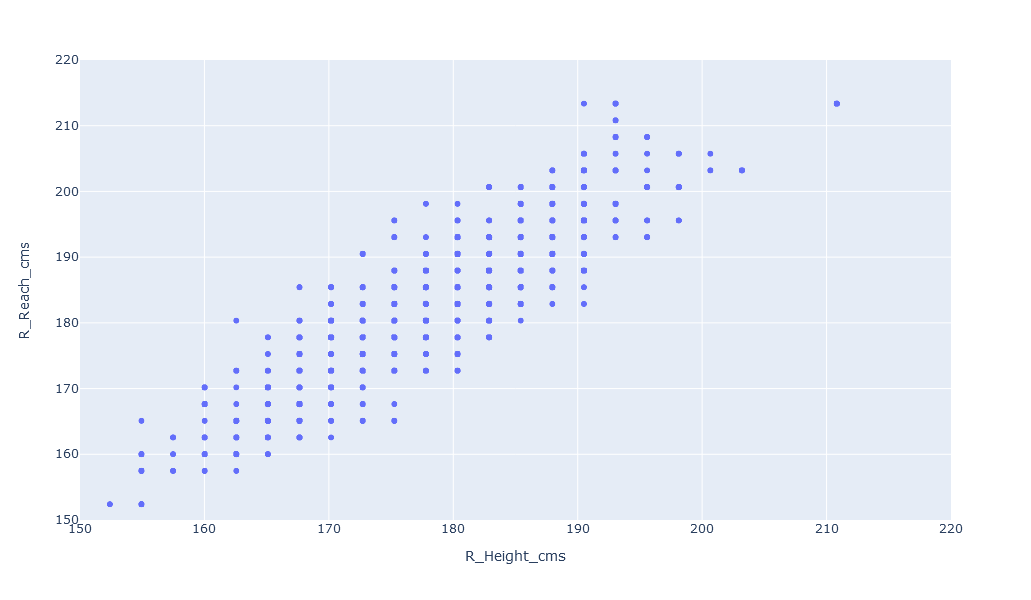

In [166]:
px.scatter(df, x="R_Height_cms", y="R_Reach_cms", range_x=[150,220], range_y=[150,220], width=600, height=600)

In [167]:
# get a feeling about the deviation between reach and height
(df["R_Height_cms"] - df["R_Reach_cms"]).abs().fillna("0").astype("float64").describe()

count    3648.000000
mean        5.105066
std         3.992268
min         0.000000
25%         2.540000
50%         5.080000
75%         7.620000
max        22.860000
dtype: float64

In [168]:
(df["B_Height_cms"] - df["B_Reach_cms"]).abs().fillna("0").astype("float64").describe()

count    3648.000000
mean        4.768766
std         3.987520
min         0.000000
25%         2.540000
50%         5.080000
75%         7.620000
max        20.320000
dtype: float64

The correclation seems good enough. Only a few centimeters deviation. So this is our best guess.

### Reach correlates with height - Fill missing values

In [169]:
df["R_Reach_cms"] = df["R_Reach_cms"].fillna(df["R_Height_cms"])

C:\Users\areinhofer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [170]:
df["R_Reach_cms"].isna().sum()

0

In [171]:
df["B_Reach_cms"] = df["B_Reach_cms"].fillna(df["B_Height_cms"])

C:\Users\areinhofer\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
df["R_Reach_cms"].isna().sum()

0

In [173]:
nan_cols()

NaN columns
Referee 16
B_Stance 74
B_Height_cms 1
R_Stance 76
B_age 56
R_age 12


### Get most frequent stands to fill missing values

In [174]:
df["B_Stance"].value_counts()

Orthodox       2727
Southpaw        724
Switch          116
Open Stance       5
Sideways          2
Name: B_Stance, dtype: int64

In [175]:
df["B_Stance"].isnull().sum()

74

In [176]:
df['R_Stance'].value_counts()

Orthodox       2695
Southpaw        765
Switch          100
Open Stance      12
Name: R_Stance, dtype: int64

In [177]:
df["R_Stance"].isnull().sum()

76

Not many stances are missing. To use the most frequent one is reasonable.

In [178]:
# Fill most frequent stance for missing values
categorical_columns_missing = ["R_Stance", "B_Stance"]
impute_missing=SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
df[categorical_columns_missing] = impute_missing.fit_transform(df[categorical_columns_missing])

C:\Users\areinhofer\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\areinhofer\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [179]:
df["B_Stance"].value_counts()

Orthodox       2801
Southpaw        724
Switch          116
Open Stance       5
Sideways          2
Name: B_Stance, dtype: int64

In [180]:
df["B_Stance"].isnull().sum()

0

In [181]:
df["R_Stance"].isnull().sum()

0

In [182]:
# see what's left with NaN
nan_cols()

NaN columns
Referee 16
B_Height_cms 1
B_age 56
R_age 12


### Get the median for the rest of the missing values

In [183]:
df = df.fillna(df.median())

In [184]:
nan_cols()

NaN columns
Referee 16


## Delete unneccesary data

### Eliminate Draws, we don't want to predict them

In [185]:
df.Winner.value_counts()

Red     2380
Blue    1212
Draw      56
Name: Winner, dtype: int64

In [186]:
df = df[df.Winner != "Draw"]

In [187]:
df = df.drop(["R_draw", "B_draw"], axis=1)

In [188]:
df.Winner.value_counts()

Red     2380
Blue    1212
Name: Winner, dtype: int64

In [189]:
df.shape

(3592, 143)

In [190]:
df.dtypes

R_fighter                        object
B_fighter                        object
Referee                          object
date                             object
location                         object
Winner                           object
title_bout                         bool
weight_class                     object
no_of_rounds                      int64
B_current_lose_streak           float64
B_current_win_streak            float64
B_avg_BODY_att                  float64
                                 ...   
R_win_by_Decision_Split         float64
R_win_by_Decision_Unanimous     float64
R_win_by_KO/TKO                 float64
R_win_by_Submission             float64
R_win_by_TKO_Doctor_Stoppage    float64
R_wins                          float64
R_Stance                         object
R_Height_cms                    float64
R_Reach_cms                     float64
R_Weight_lbs                    float64
B_age                           float64
R_age                           float64


## Combine winners and fighter master data

In [191]:
df_fighter = pd.read_csv("../data/raw/UFC/raw_fighter_details.csv", sep=",")

In [192]:
#add prefix for later use
df_fighter = df_fighter.add_prefix('winner_')

In [193]:
df_fighter

winner_fighter_name winner_Height  ... winner_Stance    winner_DOB
0                 AJ Fonseca         5' 4"  ...           NaN           NaN
1                AJ Matthews        5' 11"  ...           NaN           NaN
2                   AJ McKee        5' 10"  ...           NaN           NaN
3                  AJ Siscoe         5' 7"  ...           NaN           NaN
4                 Aalon Cruz         6' 0"  ...           NaN           NaN
5                Aaron Brink         6' 3"  ...      Orthodox  Nov 12, 1974
6                  Aaron Ely         5' 8"  ...           NaN  Mar 18, 1989
7              Aaron Jeffery         6' 2"  ...           NaN  Nov 14, 1992
8            Aaron Lanfranco           NaN  ...           NaN  Aug 26, 1986
...                      ...           ...  ...           ...           ...
3304               Zak Ottow        5' 11"  ...      Orthodox  Dec 22, 1986
3305            Zane Frazier         6' 5"  ...      Orthodox           NaN
3306  Zarah Fairn dos Santos        5' 10"  ...           NaN  Dec 12, 1986
3307            Zelg Galesic         6' 2"  ...      Orthodox  Feb 16, 1979
3308           Zelim Imadaev         6' 0"  ...      Orthodox  Jan 25, 1995
3309            Zhang Lipeng        5' 11"  ...      Southpaw  Mar 10, 1990
3310           Zoila Frausto         5' 4"  ...      Orthodox           NaN
3311              Zu Anyanwu         6' 1"  ...      Orthodox  Aug 05, 1981
3312        Zubaira Tukhugov         5' 8"  ...      Orthodox  Jan 15, 1991

[3313 rows x 6 columns]

In [194]:
# copy fights df, to not influence output files
df_w_fighter = df.copy(deep=True)

In [195]:
# determine winner name and age
df_w_fighter['WinnerName'] = 'Unknown'
df_w_fighter['WinnerAge'] = 0

df_w_fighter.loc[df_w_fighter['Winner']=="Red", 'WinnerName'] = df_w_fighter.R_fighter
df_w_fighter.loc[df_w_fighter['Winner']=="Red", 'WinnerAge'] = df_w_fighter.R_age

df_w_fighter.loc[df_w_fighter['Winner']=="Blue", 'WinnerName'] = df_w_fighter.B_fighter
df_w_fighter.loc[df_w_fighter['Winner']=="Blue", 'WinnerAge'] = df_w_fighter.B_age

In [196]:
df_w_fighter[["WinnerName", "WinnerAge", "Winner", "R_fighter", "R_age", "B_fighter", "B_age", "title_bout"]]

WinnerName  WinnerAge Winner  ...       B_fighter  B_age title_bout
0             Henry Cejudo       32.0    Red  ...   Marlon Moraes   31.0       True
1     Valentina Shevchenko       31.0    Red  ...     Jessica Eye   32.0       True
2            Tony Ferguson       35.0    Red  ...  Donald Cerrone   36.0      False
3                 Petr Yan       26.0   Blue  ...        Petr Yan   26.0      False
4            Blagoy Ivanov       32.0   Blue  ...   Blagoy Ivanov   32.0      False
5           Tatiana Suarez       28.0    Red  ...   Nina Ansaroff   33.0      False
6        Aljamain Sterling       29.0    Red  ...    Pedro Munhoz   32.0      False
7             Alexa Grasso       25.0   Blue  ...    Alexa Grasso   25.0      False
8            Calvin Kattar       31.0   Blue  ...   Calvin Kattar   31.0      False
...                    ...        ...    ...  ...             ...    ...        ...
5121          Royce Gracie       27.0    Red  ...   Patrick Smith   30.0       True
5122          Royce Gracie       27.0    Red  ...   Remco Pardoel   29.0      False
5123         Patrick Smith       30.0    Red  ...   Johnny Rhodes   29.0      False
5124          Royce Gracie       27.0    Red  ...   Jason DeLucia   24.0      False
5125         Remco Pardoel       30.0    Red  ...    Orlando Wiet   29.0      False
5127         Patrick Smith       30.0    Red  ...    Scott Morris   29.0      False
5136          Royce Gracie       26.0    Red  ...  Gerard Gordeau   34.0       True
5138          Royce Gracie       26.0    Red  ...    Ken Shamrock   29.0      False
5139        Gerard Gordeau       34.0    Red  ...    Kevin Rosier   29.0      False

[3592 rows x 8 columns]

In [197]:
df_w_fighter[(df_w_fighter.WinnerName == "Unknown") | (df_w_fighter.WinnerAge <= 0.0)]

Empty DataFrame
Columns: [R_fighter, B_fighter, Referee, date, location, Winner, title_bout, weight_class, no_of_rounds, B_current_lose_streak, B_current_win_streak, B_avg_BODY_att, B_avg_BODY_landed, B_avg_CLINCH_att, B_avg_CLINCH_landed, B_avg_DISTANCE_att, B_avg_DISTANCE_landed, B_avg_GROUND_att, B_avg_GROUND_landed, B_avg_HEAD_att, B_avg_HEAD_landed, B_avg_KD, B_avg_LEG_att, B_avg_LEG_landed, B_avg_PASS, B_avg_REV, B_avg_SIG_STR_att, B_avg_SIG_STR_landed, B_avg_SIG_STR_pct, B_avg_SUB_ATT, B_avg_TD_att, B_avg_TD_landed, B_avg_TD_pct, B_avg_TOTAL_STR_att, B_avg_TOTAL_STR_landed, B_longest_win_streak, B_losses, B_avg_opp_BODY_att, B_avg_opp_BODY_landed, B_avg_opp_CLINCH_att, B_avg_opp_CLINCH_landed, B_avg_opp_DISTANCE_att, B_avg_opp_DISTANCE_landed, B_avg_opp_GROUND_att, B_avg_opp_GROUND_landed, B_avg_opp_HEAD_att, B_avg_opp_HEAD_landed, B_avg_opp_KD, B_avg_opp_LEG_att, B_avg_opp_LEG_landed, B_avg_opp_PASS, B_avg_opp_REV, B_avg_opp_SIG_STR_att, B_avg_opp_SIG_STR_landed, B_avg_opp_SIG_STR_pct, B_avg_opp_SUB_ATT, B_avg_opp_TD_att, B_avg_opp_TD_landed, B_avg_opp_TD_pct, B_avg_opp_TOTAL_STR_att, B_avg_opp_TOTAL_STR_landed, B_total_rounds_fought, B_total_time_fought(seconds), B_total_title_bouts, B_win_by_Decision_Majority, B_win_by_Decision_Split, B_win_by_Decision_Unanimous, B_win_by_KO/TKO, B_win_by_Submission, B_win_by_TKO_Doctor_Stoppage, B_wins, B_Stance, B_Height_cms, B_Reach_cms, B_Weight_lbs, R_current_lose_streak, R_current_win_streak, R_avg_BODY_att, R_avg_BODY_landed, R_avg_CLINCH_att, R_avg_CLINCH_landed, R_avg_DISTANCE_att, R_avg_DISTANCE_landed, R_avg_GROUND_att, R_avg_GROUND_landed, R_avg_HEAD_att, R_avg_HEAD_landed, R_avg_KD, R_avg_LEG_att, R_avg_LEG_landed, R_avg_PASS, R_avg_REV, R_avg_SIG_STR_att, R_avg_SIG_STR_landed, R_avg_SIG_STR_pct, R_avg_SUB_ATT, R_avg_TD_att, R_avg_TD_landed, R_avg_TD_pct, R_avg_TOTAL_STR_att, ...]
Index: []

[0 rows x 145 columns]

In [198]:
# get fighter master data to the dataset
df_w_fighter = df_w_fighter.join(df_fighter.set_index('winner_fighter_name'), on="WinnerName")

In [199]:
df_w_fighter["WinningDate"] = df_w_fighter.date

In [200]:
df_w_fighter = df_w_fighter[["WinnerName", "WinnerAge", "winner_Height", "winner_Weight", "winner_Reach", "winner_Stance", "winner_DOB", "WinningDate", "title_bout"]]

In [201]:
df_w_fighter

WinnerName  WinnerAge  ... WinningDate title_bout
0             Henry Cejudo       32.0  ...  2019-06-08       True
1     Valentina Shevchenko       31.0  ...  2019-06-08       True
2            Tony Ferguson       35.0  ...  2019-06-08      False
3                 Petr Yan       26.0  ...  2019-06-08      False
4            Blagoy Ivanov       32.0  ...  2019-06-08      False
5           Tatiana Suarez       28.0  ...  2019-06-08      False
6        Aljamain Sterling       29.0  ...  2019-06-08      False
7             Alexa Grasso       25.0  ...  2019-06-08      False
8            Calvin Kattar       31.0  ...  2019-06-08      False
...                    ...        ...  ...         ...        ...
5121          Royce Gracie       27.0  ...  1994-03-11       True
5122          Royce Gracie       27.0  ...  1994-03-11      False
5123         Patrick Smith       30.0  ...  1994-03-11      False
5124          Royce Gracie       27.0  ...  1994-03-11      False
5125         Remco Pardoel       30.0  ...  1994-03-11      False
5127         Patrick Smith       30.0  ...  1994-03-11      False
5136          Royce Gracie       26.0  ...  1993-11-12       True
5138          Royce Gracie       26.0  ...  1993-11-12      False
5139        Gerard Gordeau       34.0  ...  1993-11-12      False

[3592 rows x 9 columns]

### Drop columns
It looks like Fighter names, Referees, dates and location should not influence the prediction and statistics

In [202]:
df = df.drop(["R_fighter", "B_fighter", "Referee", "date", "location"], axis=1)

In [203]:
df.dtypes

Winner                           object
title_bout                         bool
weight_class                     object
no_of_rounds                      int64
B_current_lose_streak           float64
B_current_win_streak            float64
B_avg_BODY_att                  float64
B_avg_BODY_landed               float64
B_avg_CLINCH_att                float64
B_avg_CLINCH_landed             float64
B_avg_DISTANCE_att              float64
B_avg_DISTANCE_landed           float64
                                 ...   
R_win_by_Decision_Split         float64
R_win_by_Decision_Unanimous     float64
R_win_by_KO/TKO                 float64
R_win_by_Submission             float64
R_win_by_TKO_Doctor_Stoppage    float64
R_wins                          float64
R_Stance                         object
R_Height_cms                    float64
R_Reach_cms                     float64
R_Weight_lbs                    float64
B_age                           float64
R_age                           float64


## Write clean files

In [204]:
df.to_csv("../data/clean/UFC-cleaned.csv", index=False)

In [205]:
df_w_fighter.to_csv("../data/clean/UFC-cleaned-with-fighternames.csv", index=False)